1. IMPORT LIBRARIES AND LOAD DATASET

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import country_converter as coco



df = pd.read_csv("global air pollution dataset.csv")
dfCity =  pd.read_csv("world-cities_csv.csv")

print(df.info())




/Users/luuvan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


2. ANALYZE ALL COLLUMNS AND DATA TYPES

In [2]:
print(dfCity.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23018 entries, 0 to 23017
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        23018 non-null  object
 1   country     23018 non-null  object
 2   subcountry  22992 non-null  object
 3   geonameid   23018 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 719.4+ KB
None


3. CLEANING THE MISSING ROWS USING COUNTRY CONVERT LIBRARY

In [3]:

df = df.merge(dfCity[["name", "country"]], how="left", left_on="City", right_on="name")
df["Country"] = df["Country"].fillna(df["country"])
df.drop(columns=["name", "country"], inplace=True)
print("Number of missing row \n" , df.isnull().sum())

missing_cities = df[df["Country"].isna()]["City"].unique()
print("Number of city missing:", len(missing_cities))
dfClean =df.dropna()


Number of missing row 
 Country               215
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64
Number of city missing: 215


4. DESCRIPTIVE STATISTICS

In [4]:
dfClean.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,24177.000000,24177.000000,24177.000000,24177.000000,24177.000000
mean,71.920503,1.380527,34.944410,3.178641,68.485751
std,55.834957,2.009647,27.985684,5.357641,54.549730
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,30.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,78.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bac Giang'),
  Text(1, 0, 'Thai Binh'),
  Text(2, 0, 'Phu Ly'),
  Text(3, 0, 'Hoa Binh'),
  Text(4, 0, 'Hai Phong'),
  Text(5, 0, 'Hong Gai'),
  Text(6, 0, 'Uong Bi'),
  Text(7, 0, 'Can Tho'),
  Text(8, 0, 'Son Tay'),
  Text(9, 0, 'Nam Dinh')])

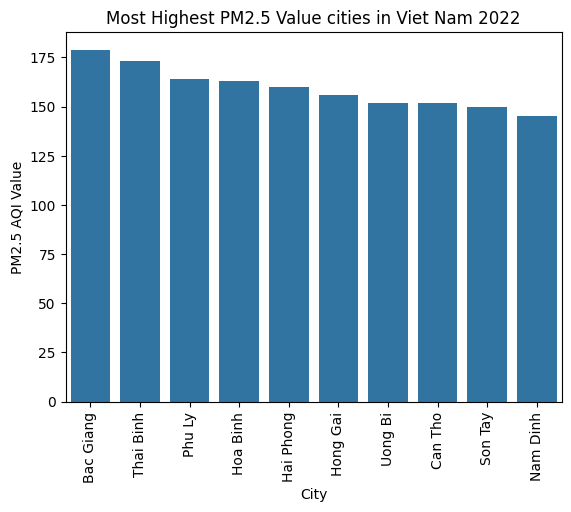

In [6]:
dfViet = dfClean[dfClean["Country"].str.contains("Viet")]
dfViet = dfViet.sort_values(by="PM2.5 AQI Value", ascending=False).head(10)
## data set from 2022
sns.barplot(
    data= dfViet,
    x = "City",
    y = "PM2.5 AQI Value",
)
plt.title("Most Highest PM2.5 Value cities in Viet Nam 2022")
plt.xlabel("City")
plt.ylabel("PM2.5 AQI Value")
plt.xticks(rotation = 90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Son Tay'),
  Text(1, 0, 'Hanoi'),
  Text(2, 0, 'Bac Giang'),
  Text(3, 0, 'Thai Binh'),
  Text(4, 0, 'Tuyen Quang'),
  Text(5, 0, 'Phu Ly'),
  Text(6, 0, 'Hoa Binh'),
  Text(7, 0, 'Hai Phong'),
  Text(8, 0, 'Yen Bai'),
  Text(9, 0, 'Hong Gai')])

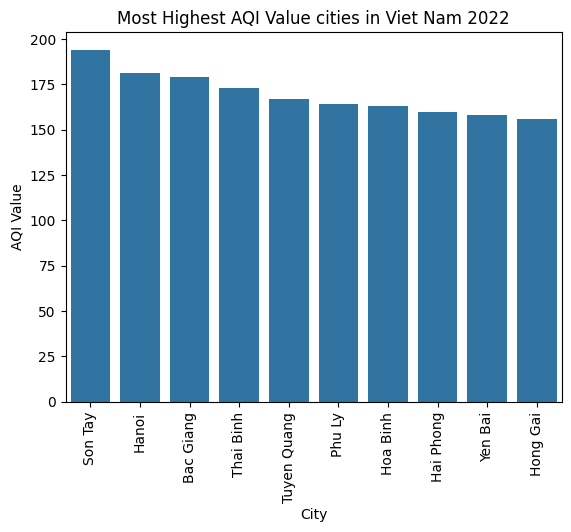

In [10]:
dfViet = dfClean[dfClean["Country"].str.contains("Viet")]
dfViet = dfViet.sort_values(by="AQI Value", ascending=False).head(10)
sns.barplot(
    data= dfViet,
    x = "City",
    y = "AQI Value",
)
plt.title("Most Highest AQI Value cities in Viet Nam 2022")
plt.xlabel("City")
plt.ylabel("AQI Value")
plt.xticks(rotation = 90)


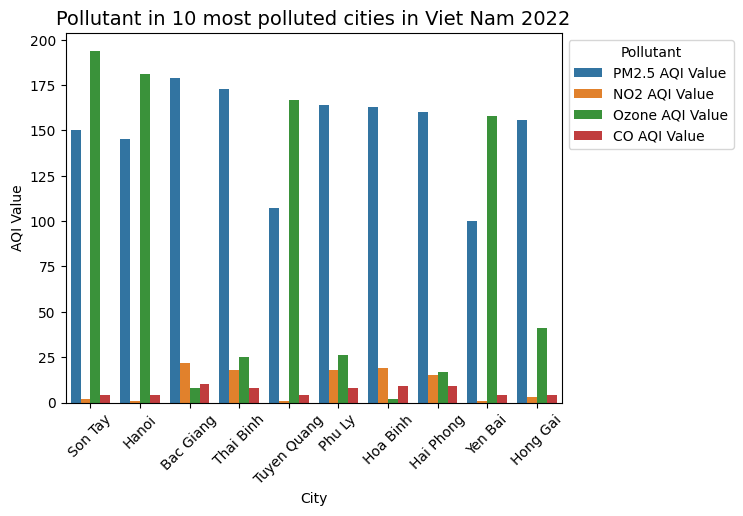

In [16]:
df_melt = dfViet.melt(
    id_vars="City", 
    value_vars=["PM2.5 AQI Value", "NO2 AQI Value", "Ozone AQI Value", "CO AQI Value"],
    var_name="Pollutant",
    value_name="Value"
)
sns.barplot(
    data=df_melt,
    x="City",
    y="Value",
    hue="Pollutant"
)

plt.title("Pollutant in 10 most polluted cities in Viet Nam 2022", fontsize=14)
plt.xlabel("City")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)
plt.legend(title="Pollutant", loc = "upper left" , bbox_to_anchor=(1, 1))


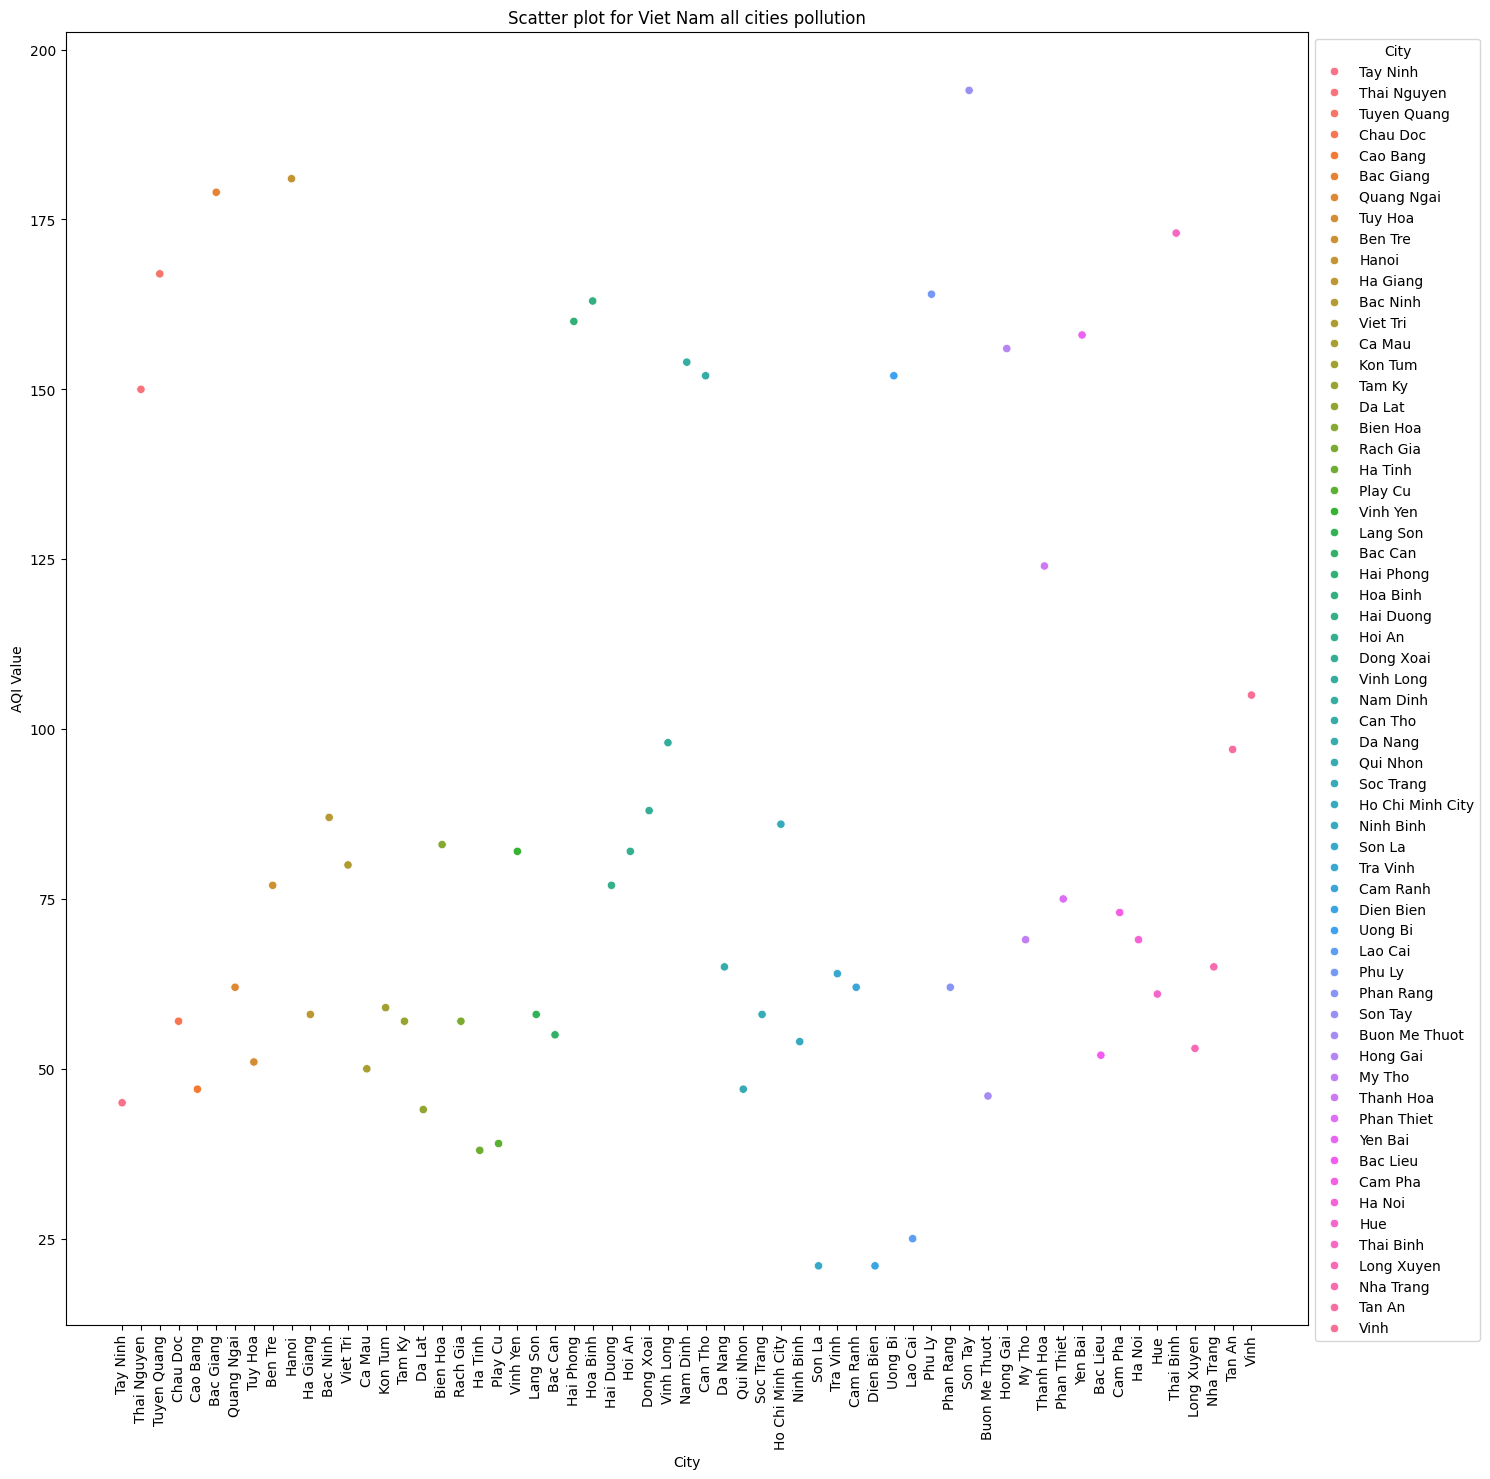

In [30]:
dataVn = dfClean[dfClean["Country"].str.contains("Viet")]

plt.figure(figsize=(15,15))

sns.scatterplot(
    data=dataVn,
    x="City",
    y="AQI Value",
    hue="City"
)
plt.title("Scatter plot for Viet Nam all cities pollution")
plt.xlabel("City")
plt.ylabel("AQI Value")
plt.xticks(rotation=90)
plt.legend(title="City", loc = "upper left" , bbox_to_anchor=(1, 1))
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Republic of Korea'),
  Text(1, 0, 'Mauritania'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Bahrain'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'Saint Vincent and the Grenadines'),
  Text(6, 0, 'Aruba'),
  Text(7, 0, 'Kuwait'),
  Text(8, 0, 'Qatar'),
  Text(9, 0, 'India')])

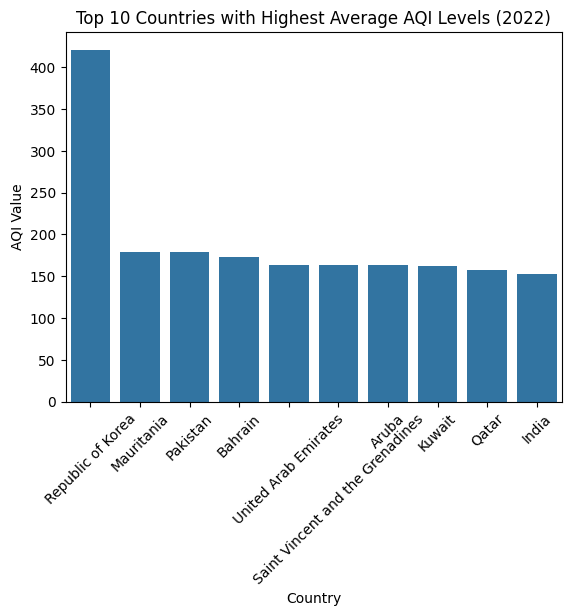

In [31]:
dfWorld = dfClean.groupby("Country")["AQI Value"].mean()
dfWorld = dfWorld.sort_values(ascending=False).head(10).reset_index()


sns.barplot(
    data=dfWorld,
    x="Country",
    y="AQI Value",
)

plt.title("Top 10 Countries with Highest Average AQI Levels (2022)")
plt.xlabel("Country")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Solomon Islands'),
  Text(1, 0, 'Palau'),
  Text(2, 0, 'Bahamas'),
  Text(3, 0, 'Samoa'),
  Text(4, 0, 'Maldives'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'Mayotte'),
  Text(7, 0, 'Iceland'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Sweden')])

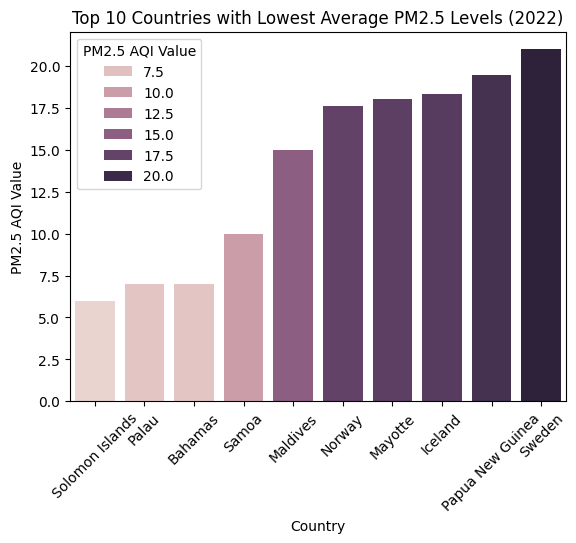

In [32]:
dfWorld = dfClean.groupby("Country")["PM2.5 AQI Value"].mean()
dfWorld = dfWorld.sort_values(ascending=True).head(10).reset_index()


sns.barplot(
    data=dfWorld,
    x="Country",
    y="PM2.5 AQI Value",
    hue="PM2.5 AQI Value"
)

plt.title("Top 10 Countries with Lowest Average PM2.5 Levels (2022)")
plt.xlabel("Country")
plt.ylabel("PM2.5 AQI Value")
plt.xticks(rotation=45)

In [34]:
dfWorld = dfClean.groupby("Country")["PM2.5 AQI Value"].mean().reset_index()

fig = px.choropleth(
    dfWorld,
    locations="Country",
    locationmode="country names",
    color="PM2.5 AQI Value",
    hover_name="Country",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Global average PM2.5 Levels (2022)",
    width=700,
    height=500,
)
fig.show()


5. ADD REGION COLLUMNS FOR ANALYZE AREA POLLUTION

In [ ]:
dfClean["Region"] = coco.convert(names = dfClean["Country"], to = "continent")


/var/folders/cy/5wq6vb69521fy77bs9pj5g7h0000gn/T/ipykernel_1996/744056982.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Pie chart display area pollution')

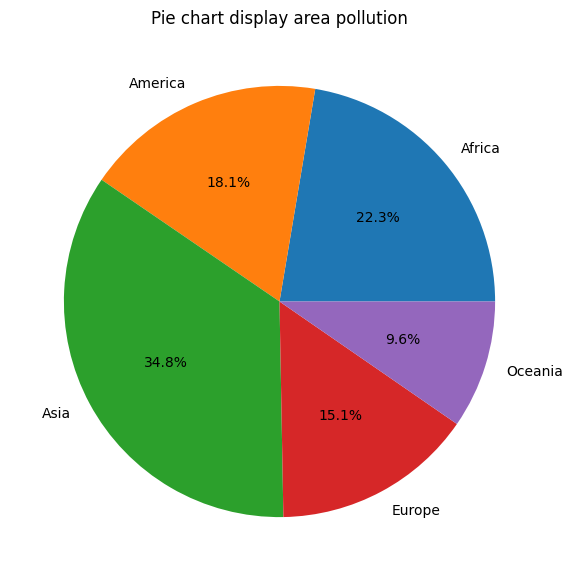

In [36]:
regionData = dfClean.groupby("Region")["AQI Value"].mean().reset_index()

plt.figure(figsize=(7, 7))
plt.pie(
    regionData["AQI Value"],
    labels=regionData["Region"],
    autopct="%1.1f%%",  
)

plt.title("Pie chart display area pollution")

                 AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.411765         0.402028       0.229641   
CO AQI Value      0.411765      1.000000         0.124670       0.463652   
Ozone AQI Value   0.402028      0.124670         1.000000      -0.190352   
NO2 AQI Value     0.229641      0.463652        -0.190352       1.000000   
PM2.5 AQI Value   0.984367      0.420028         0.336575       0.258600   

                 PM2.5 AQI Value  
AQI Value               0.984367  
CO AQI Value            0.420028  
Ozone AQI Value         0.336575  
NO2 AQI Value           0.258600  
PM2.5 AQI Value         1.000000  


Text(0.5, 1.0, 'Correlation Matrix of Air Pollution Indicators')

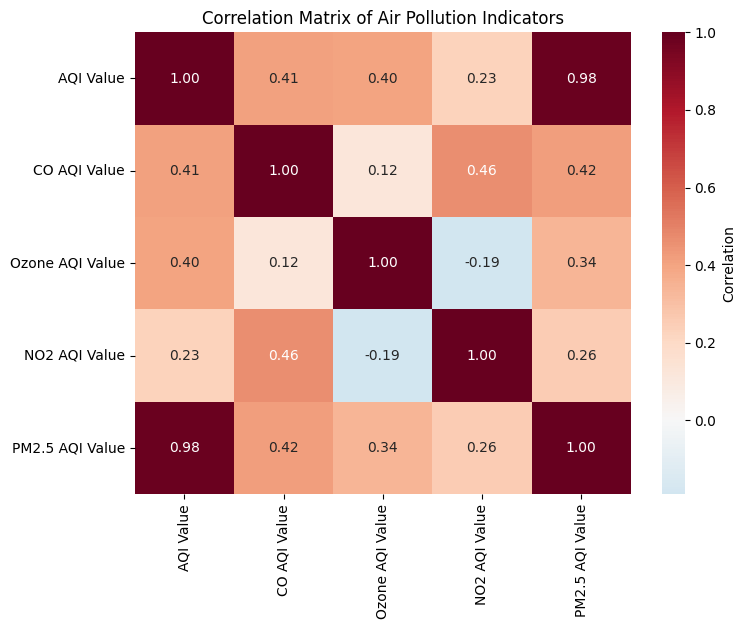

In [37]:
corr = dfClean.corr(numeric_only=True)

print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",        
    cmap="RdBu_r",     
    center=0,         
    cbar_kws={'label': 'Correlation'}
)

plt.title("Correlation Matrix of Air Pollution Indicators")

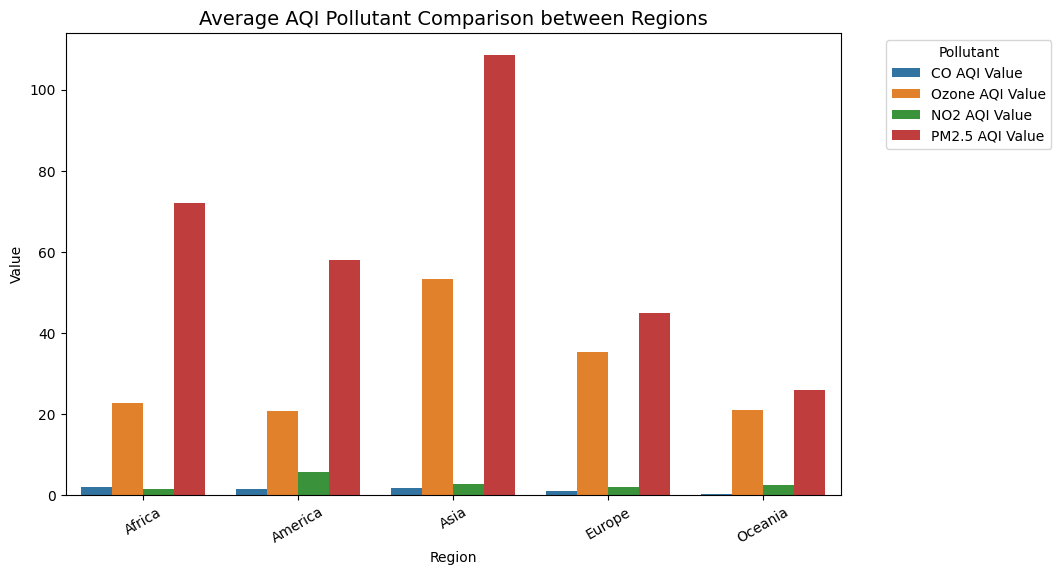

In [38]:
regionData = dfClean.groupby("Region")[["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]].mean().reset_index()

dfMelt = regionData.melt(id_vars="Region", 
                           value_vars=["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"], 
                           var_name="Pollutant", value_name="Value")
plt.figure(figsize=(10,6))
sns.barplot(data=dfMelt, x="Region", y="Value", hue="Pollutant")

plt.title("Average AQI Pollutant Comparison between Regions", fontsize=14)
plt.xticks(rotation=30)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0, 0.5, 'AQI Value')

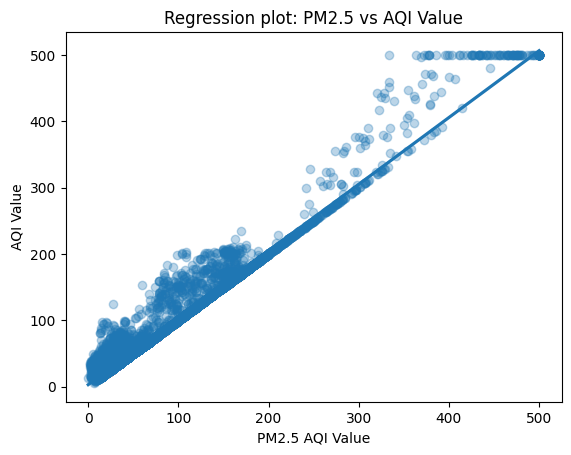

In [17]:
sns.regplot(
    x = "PM2.5 AQI Value",
    y = "AQI Value",
    data= dfClean,
    scatter_kws={"alpha":0.3}

)
plt.title("Regression plot: PM2.5 vs AQI Value")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("AQI Value")

Text(0, 0.5, 'AQI Value')

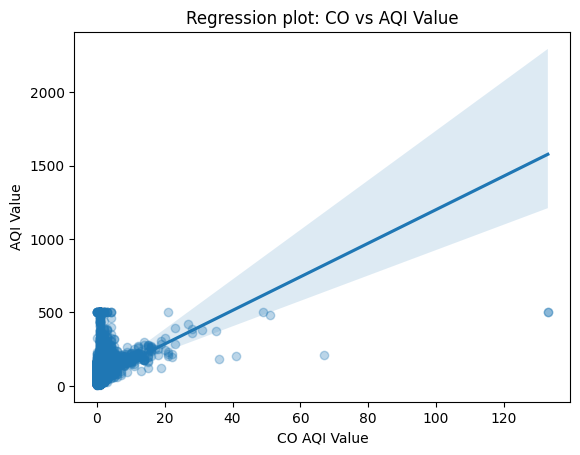

In [ ]:
sns.regplot(
    x = "CO AQI Value",
    y = "AQI Value",
    data= dfClean,
    scatter_kws={"alpha":0.3}

)
plt.title("Regression plot: CO vs AQI Value")
plt.xlabel("CO AQI Value")
plt.ylabel("AQI Value")

Text(0, 0.5, 'AQI Value')

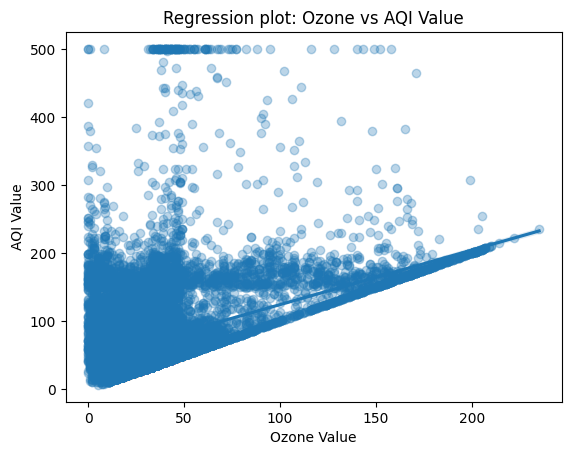

In [20]:
sns.regplot(
    x = "Ozone AQI Value",
    y = "AQI Value",
    data= dfClean,
    scatter_kws={"alpha":0.3}

)
plt.title("Regression plot: Ozone vs AQI Value")
plt.xlabel("Ozone Value")
plt.ylabel("AQI Value")

Text(0, 0.5, 'AQI Value')

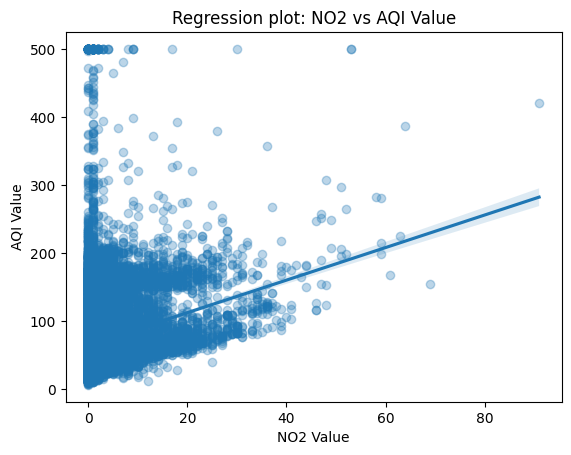

In [21]:
sns.regplot(
    x = "NO2 AQI Value",
    y = "AQI Value",
    data= dfClean,
    scatter_kws={"alpha":0.3}

)
plt.title("Regression plot: NO2 vs AQI Value")
plt.xlabel("NO2 Value")
plt.ylabel("AQI Value")

Conclusion:
- Top 10 most polluted countries are in Asia and Africa
- In Viet nam PM2.5 and Ozone pollution are the major problems
- In 2022 Northern Vietnam has many cities with dangerous air pollution
- PM2.5 is the most important factor determining air quality.